<h2> Taking Assumption that each independent variable is unique and contribute to dependent variable</h2>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns;sns.set()
import bokeh
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import os.path
my_path = os.path.abspath(os.path.dirname('__filename__'))

In [55]:
path = os.path.join(my_path + "/Data/training.csv")
data = pd.read_csv(path)


In [56]:
data.shape

(198, 16)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 16 columns):
Date    198 non-null object
X1      198 non-null float64
X2      198 non-null float64
X3      198 non-null float64
X4      198 non-null float64
X5      198 non-null float64
X6      198 non-null float64
X7      198 non-null float64
X8      198 non-null float64
X9      198 non-null float64
X10     198 non-null float64
X11     198 non-null float64
X12     198 non-null float64
X13     198 non-null float64
X14     198 non-null float64
Y       198 non-null float64
dtypes: float64(15), object(1)
memory usage: 24.8+ KB


In [58]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.007464,0.010171,0.064462,0.023311,3.575004,0.035174,7.134296,0.088846,0.978658,-3.252207,0.703126,1.566532,-4.316674,0.703126,0.871539
std,0.088190,0.088482,0.003656,0.015168,0.364546,0.058393,1.356735,0.202740,3.086574,2.832585,4.005527,3.853166,4.598012,4.005527,4.002662
min,-0.334624,-0.247467,0.055500,-0.024548,2.984957,-0.178378,3.931112,-0.294558,-5.759780,-13.102601,-14.901918,-7.272249,-51.740427,-14.901918,-14.684814
25%,-0.049604,-0.035869,0.062625,0.014747,3.250062,0.015833,6.356480,-0.033125,-1.209943,-4.950517,-1.434553,-0.551783,-5.420244,-1.434553,-1.267839
50%,0.006063,0.000000,0.066000,0.020833,3.621648,0.038835,7.206438,0.047887,0.870853,-3.251146,0.955226,1.248604,-3.620362,0.955226,1.109172
75%,0.066940,0.056121,0.067500,0.031592,3.800000,0.065343,8.109305,0.248969,2.872863,-1.311929,2.832131,3.130360,-2.416579,2.832131,2.990184
max,0.289764,0.457988,0.068500,0.085202,4.460250,0.198728,10.664091,0.520677,9.934991,9.528412,13.076928,33.562937,4.879975,13.076928,13.190439


In [59]:
#sns.pairplot(data, x_vars=['X11'], y_vars=["Y"], height=6, aspect=2, kind='reg')

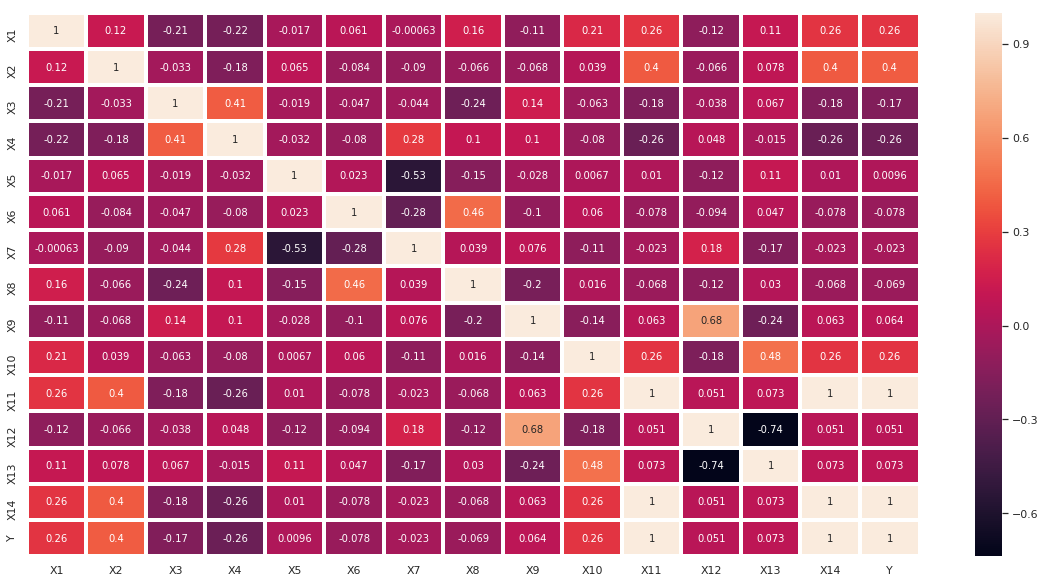

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=3)

In [61]:
y = data["Y"]
x1 = data[["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13",'X14']]
#x1 = data[["X1","X2","X4","X9","X10"]]

In [62]:
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.740e+06
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:03:54   Log-Likelihood:                 605.18
No. Observations:                 198   AIC:                            -1182.
Df Residuals:                     184   BIC:                            -1136.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1800      0.025     -7.156      0.000      -0.230      -0.130
X1            -0.0186      0.010     -1.775      0.078      -0.039       0.002
X2             0.0092      0.011      0.863      0.389      -0.012       0.030
X3             5.4589      0.285     19.184      0.000       4.898       6.020
X4             0.0915      0.071      1.287      0.200      -0.049       0.232
X5            -0.0035      0.003     -1.230      0.220      -0.009       0.002
X6             0.0451      0.018      2.565      0.011       0.010       0.080
X7             0.0002      0.001      0.266      0.790      -0.001       0.002
X8             0.0093      0.005      1.754      0.081      -0.001       0.020
X9             0.0008      0.000      1.619      0.107      -0.000       0.002
X10           -0.0006      0.000     -1.578      0.116      -0.001       0.000
X11            0.5002      0.000   3948.378      0.000       0.500       0.500
X12           -0.0005      0.001     -0.938      0.349      -0.002       0.001
X13           -0.0002      0.000     -0.406      0.685      -0.001       0.001
X14            0.5002      0.000   3948.378      0.000       0.500       0.500
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.258
Skew:                          -0.030   Prob(JB):                        0.879
Kurtosis:                       3.167   Cond. No.                     1.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h3><b>Indication of multicolinearity
"multicollinearity exists whenever two or more of the predictors in a regression model are moderately or highly correlated"</b> </h3>

In [64]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [65]:
df = data.copy()
drop_cols = ["Date","Y"]
df = data.drop(drop_cols, axis=1)
vif = variance_inflation_factors(df)
vif

/home/aman/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


const    897.870956
X1         1.201710
X2         1.257372
X3         1.528353
X4         1.643656
X5         1.558422
X6         1.490934
X7         1.876864
X8         1.630726
X9         3.200947
X10        1.860832
X11             inf
X12        6.991215
X13        4.895238
X14             inf
Name: VIF, dtype: float64

In [66]:
#match = np.sum((data['X11'] == data['X14'])) 
#match_percentage = (match / len(data)) * 100
#print("Percentage of match between data points of X11 and X14 = {}".format(match_percentage))


<h3> <b> Since X11 and X14 have coorelation 1 , VIF is infinity. Removing X11,X14 from sample.</b></h3>

In [67]:
#X = pd.DataFrame(data['X11'] + data['X14'])
#X.shape
#Y = data['Y']
#sns.pairplot(data, x_vars=X, y_vars=Y, height=6, aspect=2, kind='reg')

In [68]:
#data['X11+X14'] = data['X11'] + data['X14']
drop_cols = ["X11","X14"]
data = data.drop(drop_cols, axis=1)
sort_Col = ['Date','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X12','X13','Y']
data = data.reindex(sort_Col,axis='columns')
data.head()

,Date,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X12,X13,Y
0,2002-01,0.116883,-0.016393,0.067,0.015003,3.800087,0.114583,4.137730,-0.137107,-4.132985,-1.178848,-1.797859,-0.146711,6.848707
1,2002-02,-0.040885,-0.009722,0.067,0.015690,3.800250,0.014876,4.209800,-0.184888,-2.223157,-8.205380,-2.875011,-3.253863,-3.317476
2,2002-03,-0.032460,0.192146,0.067,0.015617,3.800318,-0.003300,4.001867,-0.232094,-4.766950,-3.340203,-3.595486,-1.271568,-9.879020
3,2002-04,0.127324,-0.132941,0.067,0.016366,3.800190,-0.015000,4.267883,-0.222937,4.232382,-1.300344,-0.991350,-2.866019,-6.129209
4,2002-05,0.051990,0.000000,0.067,0.015369,3.800435,-0.038523,4.032038,-0.235027,5.171420,-1.265530,2.131840,-2.148751,0.036724


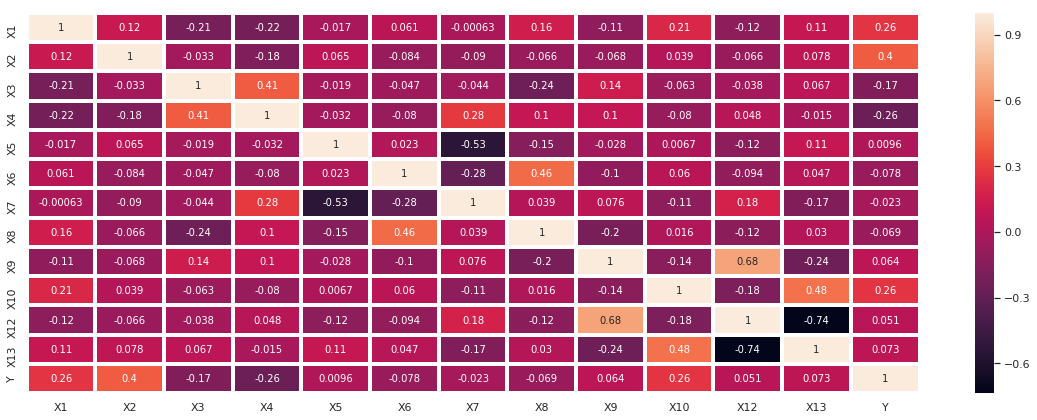

In [69]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,linewidths=3)

In [70]:
y = data["Y"]
x1 = data[["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X12","X13"]]
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     6.959
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           2.36e-10
Time:                        03:03:56   Log-Likelihood:                -518.19
No. Observations:                 198   AIC:                             1062.
Df Residuals:                     185   BIC:                             1105.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0900      7.286      0.836      0.404      -8.285      20.465
X1             6.6219      2.997      2.210      0.028       0.710      12.534
X2            16.2534      2.856      5.691      0.000      10.619      21.888
X3           -83.7241     82.342     -1.017      0.311    -246.175      78.727
X4           -38.5067     20.451     -1.883      0.061     -78.854       1.840
X5             0.1814      0.836      0.217      0.829      -1.469       1.831
X6            -2.9972      5.103     -0.587      0.558     -13.065       7.070
X7             0.1645      0.246      0.668      0.505      -0.322       0.651
X8            -0.4918      1.538     -0.320      0.750      -3.526       2.543
X9             0.1911      0.141      1.356      0.177      -0.087       0.469
X10            0.3616      0.115      3.156      0.002       0.136       0.588
X12           -0.0105      0.168     -0.062      0.950      -0.341       0.320
X13           -0.0450      0.117     -0.383      0.702      -0.277       0.187
==============================================================================
Omnibus:                       10.034   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.183
Skew:                          -0.426   Prob(JB):                      0.00373
Kurtosis:                       3.794   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df = data.copy()
drop_cols = ["Date","Y"]
df = data.drop(drop_cols, axis=1)
vif = variance_inflation_factors(df)
vif

const    894.291523
X1         1.170640
X2         1.070220
X3         1.518723
X4         1.612605
X5         1.558010
X6         1.488075
X7         1.872364
X8         1.629791
X9         3.169697
X10        1.765442
X12        6.991082
X13        4.891396
Name: VIF, dtype: float64

<h3> We still have multicolinearity, removing  X12. </h3>

In [72]:
drop_cols = ["X12"]
data = data.drop(drop_cols, axis=1)

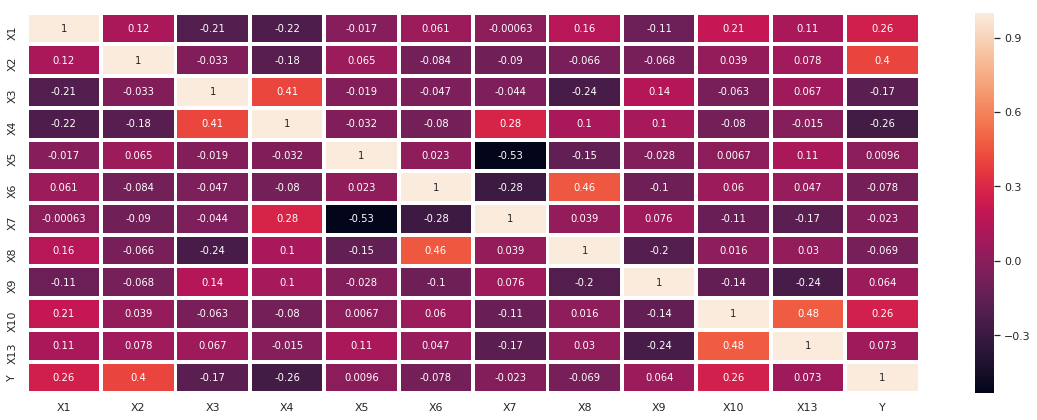

In [73]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,linewidths=3)

In [74]:
y = data["Y"]
x1 = data[["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X13"]]
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     7.632
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           8.25e-11
Time:                        03:03:57   Log-Likelihood:                -518.19
No. Observations:                 198   AIC:                             1060.
Df Residuals:                     186   BIC:                             1100.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0456      7.232      0.836      0.404      -8.222      20.313
X1             6.6414      2.973      2.234      0.027       0.777      12.506
X2            16.2422      2.843      5.714      0.000      10.634      21.850
X3           -82.9493     81.184     -1.022      0.308    -243.110      77.211
X4           -38.5551     20.381     -1.892      0.060     -78.763       1.653
X5             0.1834      0.834      0.220      0.826      -1.461       1.828
X6            -2.9928      5.089     -0.588      0.557     -13.032       7.046
X7             0.1637      0.245      0.667      0.506      -0.320       0.648
X8            -0.4906      1.534     -0.320      0.749      -3.517       2.536
X9             0.1840      0.084      2.188      0.030       0.018       0.350
X10            0.3582      0.101      3.562      0.000       0.160       0.557
X13           -0.0388      0.063     -0.616      0.539      -0.163       0.085
==============================================================================
Omnibus:                       10.013   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.166
Skew:                          -0.425   Prob(JB):                      0.00376
Kurtosis:                       3.794   Cond. No.                     3.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
df = data.copy()
drop_cols = ["Date","Y"]
df = data.drop(drop_cols, axis=1)
vif = variance_inflation_factors(df)
vif

const    885.793171
X1         1.158018
X2         1.066024
X3         1.484254
X4         1.610295
X5         1.555668
X6         1.487789
X7         1.867094
X8         1.629517
X9         1.135581
X10        1.367644
X13        1.412036
Name: VIF, dtype: float64

<h3> We still have multicolinearity, removing  X7. </h3>

In [76]:
drop_cols = ["X7"]
data = data.drop(drop_cols, axis=1)

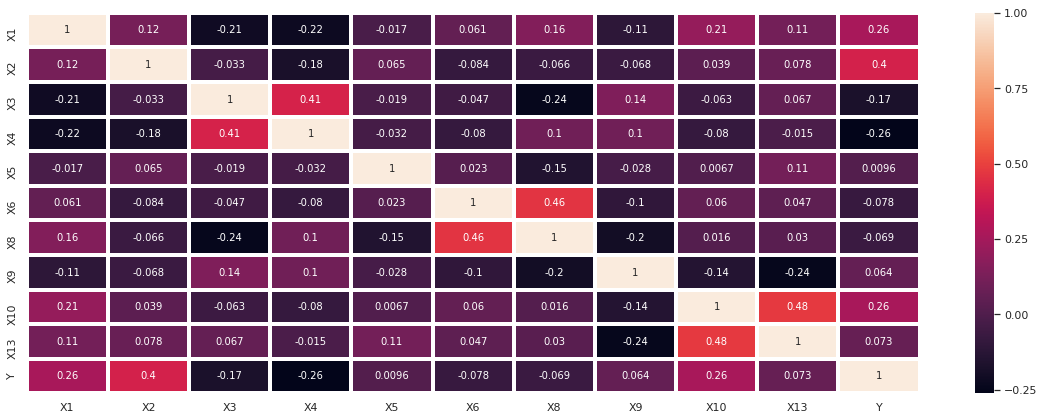

In [77]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,linewidths=3)

In [78]:
y = data["Y"]
x1 = data[["X1","X2","X3","X4","X5","X6","X8","X9","X10","X13"]]
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     8.375
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           3.34e-11
Time:                        03:03:58   Log-Likelihood:                -518.43
No. Observations:                 198   AIC:                             1059.
Df Residuals:                     187   BIC:                             1095.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9687      5.745      1.561      0.120      -2.365      20.303
X1             6.8010      2.959      2.299      0.023       0.964      12.638
X2            16.1758      2.837      5.702      0.000      10.580      21.772
X3           -94.4889     79.202     -1.193      0.234    -250.734      61.756
X4           -33.7896     19.060     -1.773      0.078     -71.390       3.811
X5            -0.1293      0.688     -0.188      0.851      -1.487       1.228
X6            -3.9403      4.879     -0.808      0.420     -13.566       5.685
X8            -0.4995      1.532     -0.326      0.745      -3.521       2.522
X9             0.1848      0.084      2.201      0.029       0.019       0.350
X10            0.3530      0.100      3.525      0.001       0.155       0.551
X13           -0.0414      0.063     -0.659      0.510      -0.165       0.082
==============================================================================
Omnibus:                       12.536   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.770
Skew:                          -0.485   Prob(JB):                     0.000620
Kurtosis:                       3.922   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
df = data.copy()
drop_cols = ["Date","Y"]
df = data.drop(drop_cols, axis=1)
vif = variance_inflation_factors(df)
vif

const    560.665473
X1         1.150513
X2         1.064715
X3         1.416873
X4         1.412489
X5         1.063562
X6         1.371895
X8         1.629392
X9         1.135343
X10        1.359296
X13        1.406564
Name: VIF, dtype: float64

<h3> now removing non significant independent variables, according to (p < 0.05), X3,X5,X6,X8,X13 </h3>

In [80]:
drop_cols = ["X3","X5","X6","X8","X13"]
data = data.drop(drop_cols, axis=1)

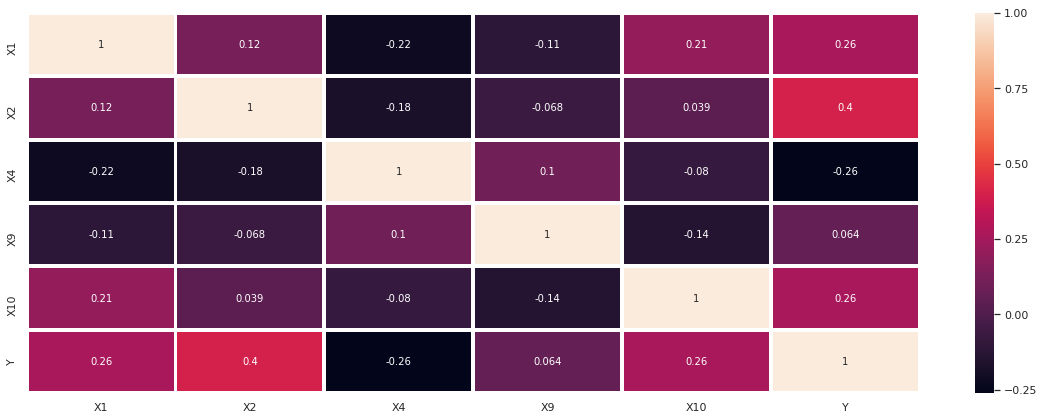

In [81]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,linewidths=3)

In [82]:
y = data["Y"]
x1 = data[["X1","X2","X4","X9","X10"]]
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     16.19
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           2.61e-13
Time:                        03:03:59   Log-Likelihood:                -520.24
No. Observations:                 198   AIC:                             1052.
Df Residuals:                     192   BIC:                             1072.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4991      0.541      4.623      0.000       1.433       3.565
X1             6.9883      2.888      2.420      0.016       1.293      12.684
X2            16.1763      2.794      5.790      0.000      10.665      21.687
X4           -42.8228     16.622     -2.576      0.011     -75.608     -10.038
X9             0.1992      0.080      2.495      0.013       0.042       0.357
X10            0.3201      0.088      3.632      0.000       0.146       0.494
==============================================================================
Omnibus:                       13.238   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.497
Skew:                          -0.512   Prob(JB):                     0.000431
Kurtosis:                       3.912   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
df = data.copy()
drop_cols = ["Date","Y"]
df = data.drop(drop_cols, axis=1)
vif = variance_inflation_factors(df)
vif

const    5.004651
X1       1.104773
X2       1.041242
X4       1.082920
X9       1.035077
X10      1.061673
Name: VIF, dtype: float64

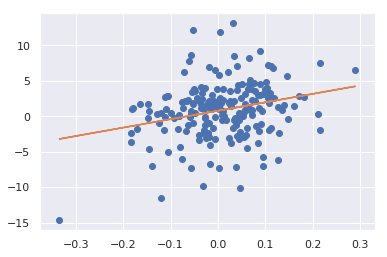

In [84]:
from numpy.polynomial.polynomial import polyfit

X = data['X1']
Y = data['Y']

b, m = polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.plot(X,Y, '.')
plt.plot(X, b + m * X, '-')
plt.show()

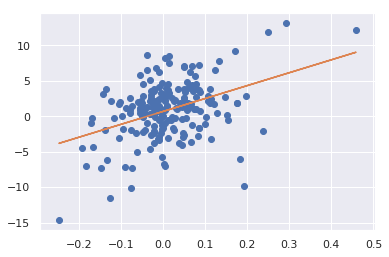

In [85]:
X = data['X2']
Y = data['Y']

b, m = polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.plot(X,Y, '.')
plt.plot(X, b + m * X, '-')
plt.show()

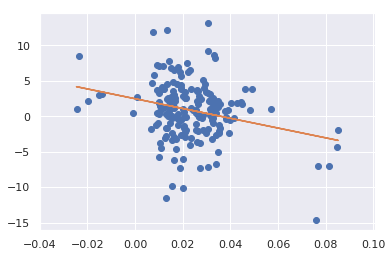

In [86]:
X = data['X4']
Y = data['Y']

b, m = polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.plot(X,Y, '.')
plt.plot(X, b + m * X, '-')
plt.show()

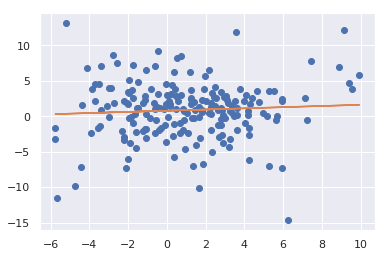

In [87]:
X = data['X9']
Y = data['Y']

b, m = polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.plot(X,Y, '.')
plt.plot(X, b + m * X, '-')
plt.show()

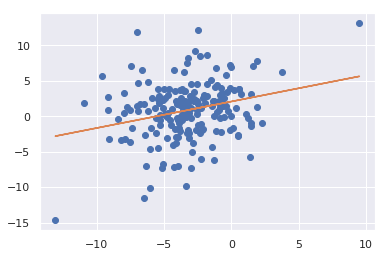

In [88]:
X = data['X10']
Y = data['Y']

b, m = polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.plot(X,Y, '.')
plt.plot(X, b + m * X, '-')
plt.show()

<h3> Observing Time Series Effect </h3>

In [89]:
data.head()

,Date,X1,X2,X4,X9,X10,Y
0,2002-01,0.116883,-0.016393,0.015003,-4.132985,-1.178848,6.848707
1,2002-02,-0.040885,-0.009722,0.015690,-2.223157,-8.205380,-3.317476
2,2002-03,-0.032460,0.192146,0.015617,-4.766950,-3.340203,-9.879020
3,2002-04,0.127324,-0.132941,0.016366,4.232382,-1.300344,-6.129209
4,2002-05,0.051990,0.000000,0.015369,5.171420,-1.265530,0.036724


In [90]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
indexedDataset = data.set_index(['Date'])

In [91]:
from datetime import datetime

In [92]:
data.head()

,Date,X1,X2,X4,X9,X10,Y
0,2002-01-01,0.116883,-0.016393,0.015003,-4.132985,-1.178848,6.848707
1,2002-02-01,-0.040885,-0.009722,0.015690,-2.223157,-8.205380,-3.317476
2,2002-03-01,-0.032460,0.192146,0.015617,-4.766950,-3.340203,-9.879020
3,2002-04-01,0.127324,-0.132941,0.016366,4.232382,-1.300344,-6.129209
4,2002-05-01,0.051990,0.000000,0.015369,5.171420,-1.265530,0.036724


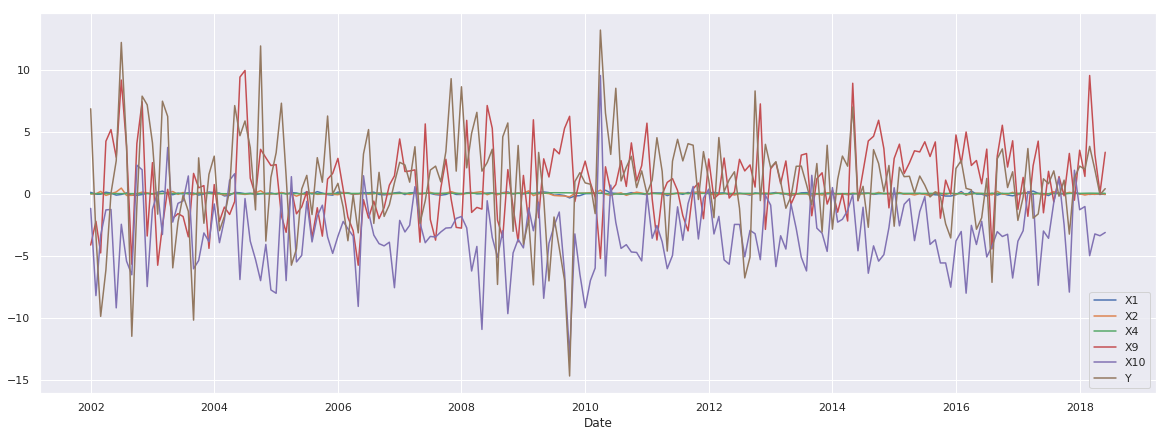

In [93]:
plt.figure(figsize=(20,7))

plt.xlabel('Date')

plt.plot(indexedDataset)
plt.legend(['X1', 'X2', 'X4', 'X9', 'X10', 'Y'])
plt.show()

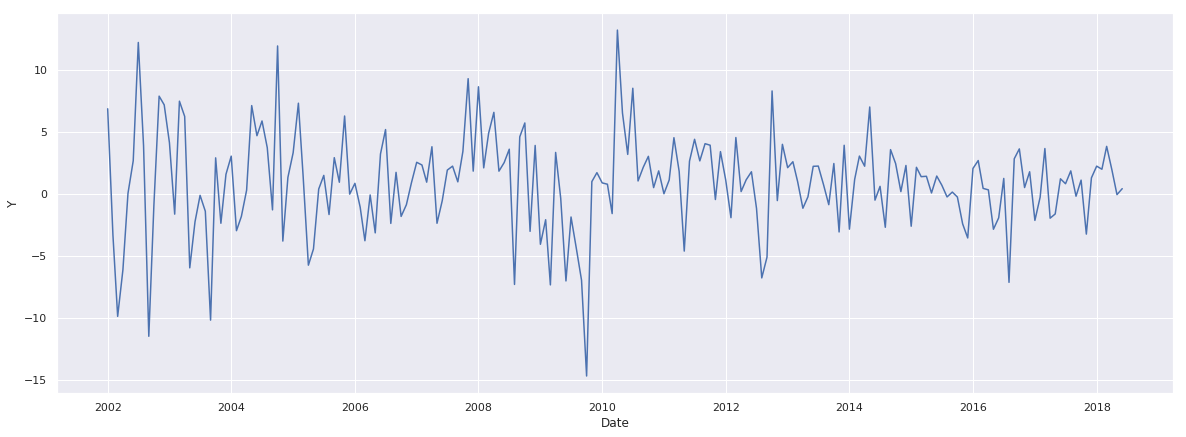

In [94]:
plt.figure(figsize=(20,7))

plt.xlabel('Date')
plt.ylabel('Y')

X = data['Date']
Y = data['Y']
plt.plot(X,Y)

<h2> Horizontal Trend is seen</h2>

In [95]:
col_ts = ['Date','Y']
df = data.loc[:,col_ts]

dataset = df.set_index(['Date'])
dataset.head()

,Y
Date,
2002-01-01,6.848707
2002-02-01,-3.317476
2002-03-01,-9.879020
2002-04-01,-6.129209
2002-05-01,0.036724


In [96]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(20,7))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    # Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Y'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

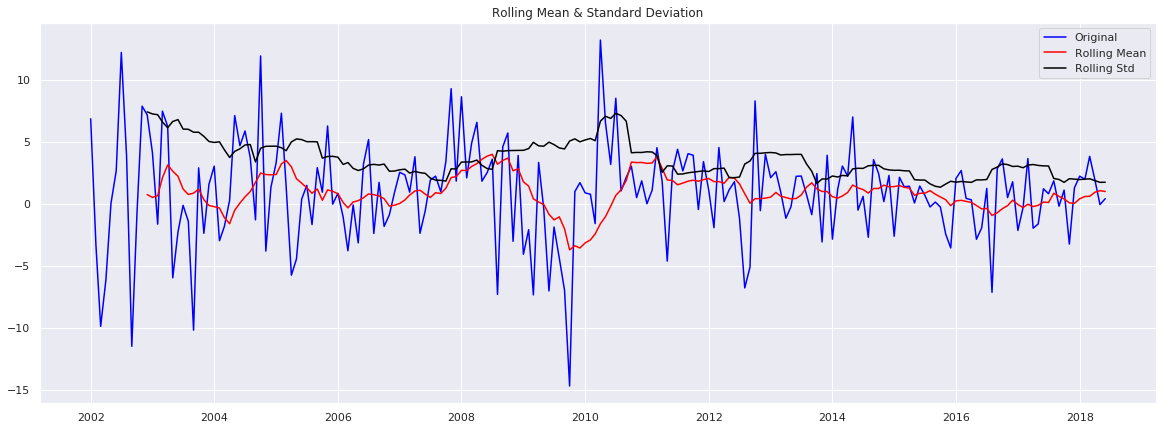

Results of Dickey-Fuller Test:
Test Statistics                -5.196512
p-value                         0.000009
#Lags Used                      9.000000
Number of Observation Used    188.000000
Critical Value (1%)            -3.465620
Critical Value (5%)            -2.877040
Critical Value (10%)           -2.575032
dtype: float64


In [108]:
test_stationarity(dataset)

Reject null hypothesis, since p-value < 1, and critical value greater than test statistics.
Stationary 

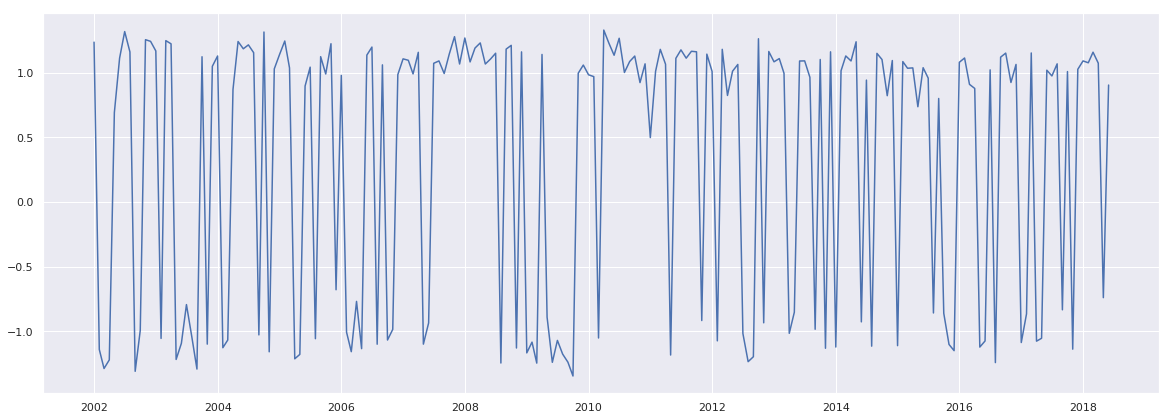

In [109]:
dataset_croot = np.cbrt(dataset)
dataset_Doublecroot = np.cbrt(dataset_croot)
plt.figure(figsize=(20,7))
plt.plot(dataset_Doublecroot)

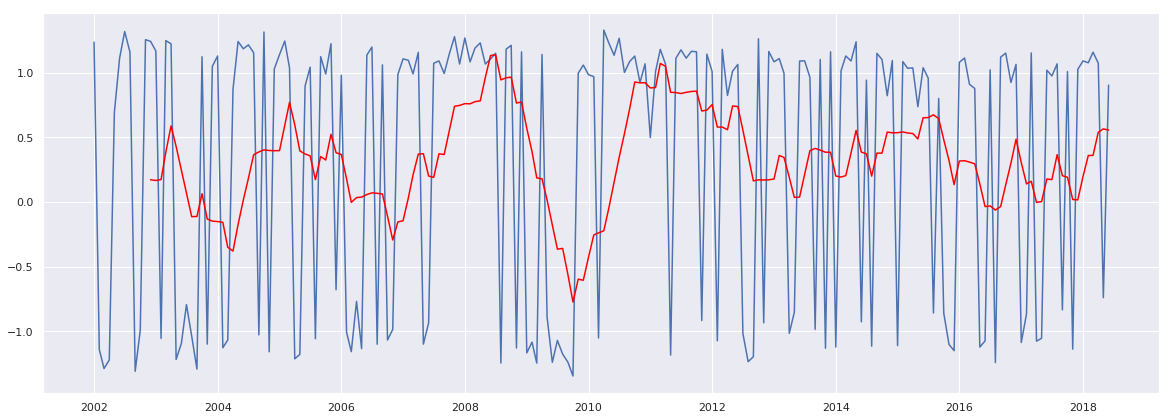

In [110]:
dataset_croot_movingAverage = dataset_Doublecroot.rolling(window = 12).mean()
plt.figure(figsize = (20,7))
plt.plot(dataset_Doublecroot)
plt.plot(dataset_croot_movingAverage, color = 'red')

In [111]:
dataset_croot_movingAverage_diffrence = dataset_Doublecroot - dataset_croot_movingAverage
dataset_croot_movingAverage_diffrence.head()

,Y
Date,
2002-01-01,NaN
2002-02-01,NaN
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN


In [112]:
dataset_croot_movingAverage_diffrence.dropna(inplace= True)
dataset_croot_movingAverage_diffrence.head()

,Y
Date,
2002-12-01,1.072191
2003-01-01,1.003405
2003-02-01,-1.230559
2003-03-01,0.864654
2003-04-01,0.635849


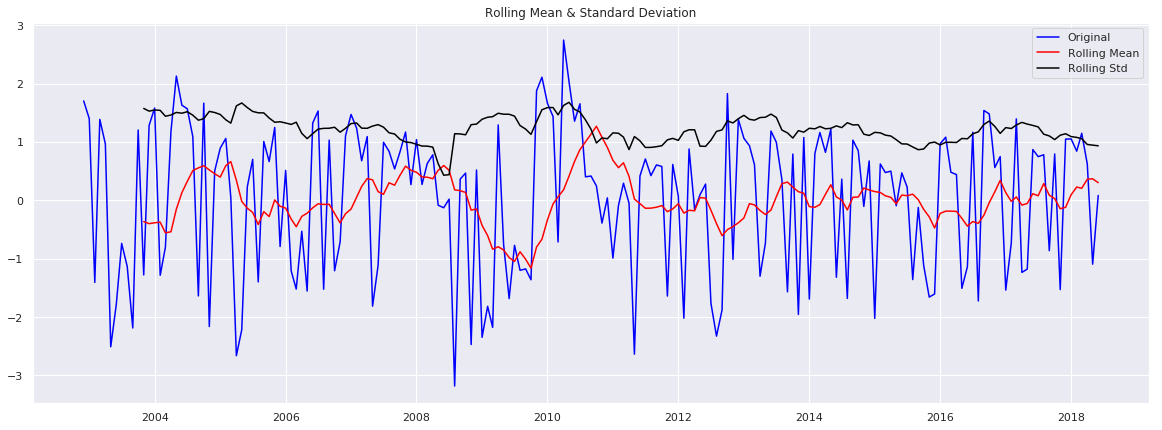

Results of Dickey-Fuller Test:
Test Statistics              -5.680673e+00
p-value                       8.500823e-07
#Lags Used                    1.000000e+01
Number of Observation Used    1.760000e+02
Critical Value (1%)          -3.468062e+00
Critical Value (5%)          -2.878106e+00
Critical Value (10%)         -2.575602e+00
dtype: float64


In [106]:
test_stationarity(dataset_croot_movingAverage_diffrence)

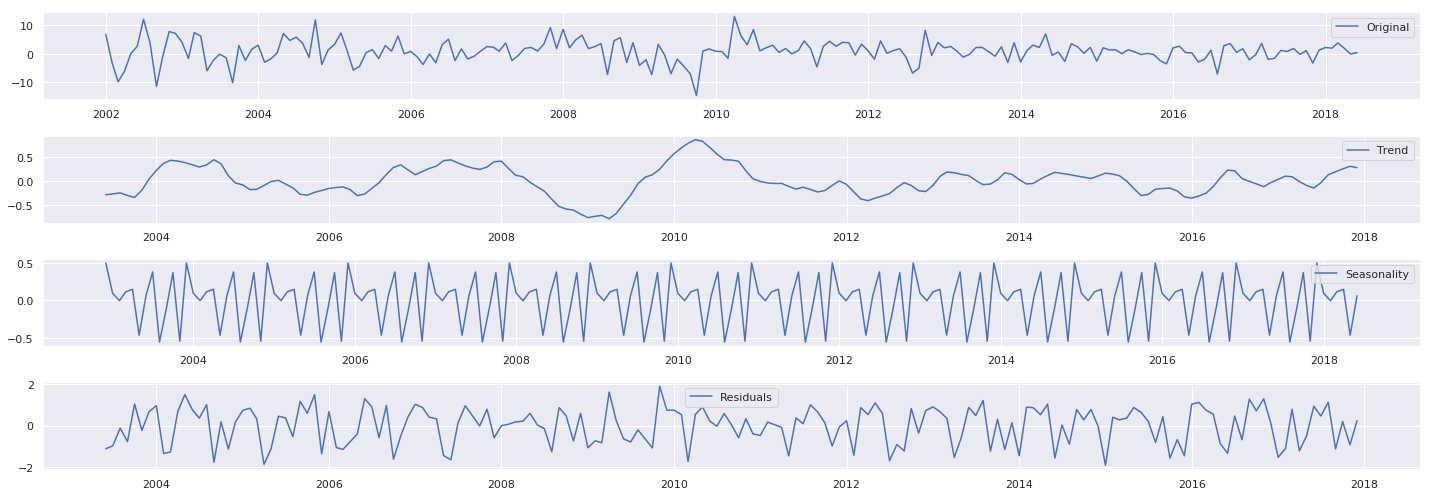

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_croot_movingAverage_diffrence)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,7))

plt.subplot(411)
plt.plot(dataset, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()

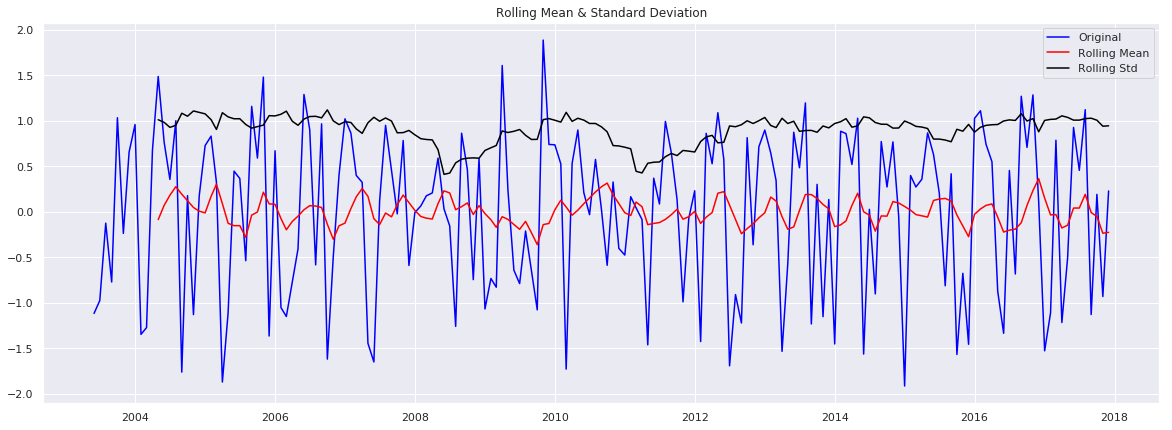

Results of Dickey-Fuller Test:
Test Statistics              -5.922989e+00
p-value                       2.481129e-07
#Lags Used                    1.400000e+01
Number of Observation Used    1.600000e+02
Critical Value (1%)          -3.471896e+00
Critical Value (5%)          -2.879780e+00
Critical Value (10%)         -2.576495e+00
dtype: float64


In [114]:
decomposedData = residual
decomposedData.dropna(inplace = True)
test_stationarity(decomposedData)

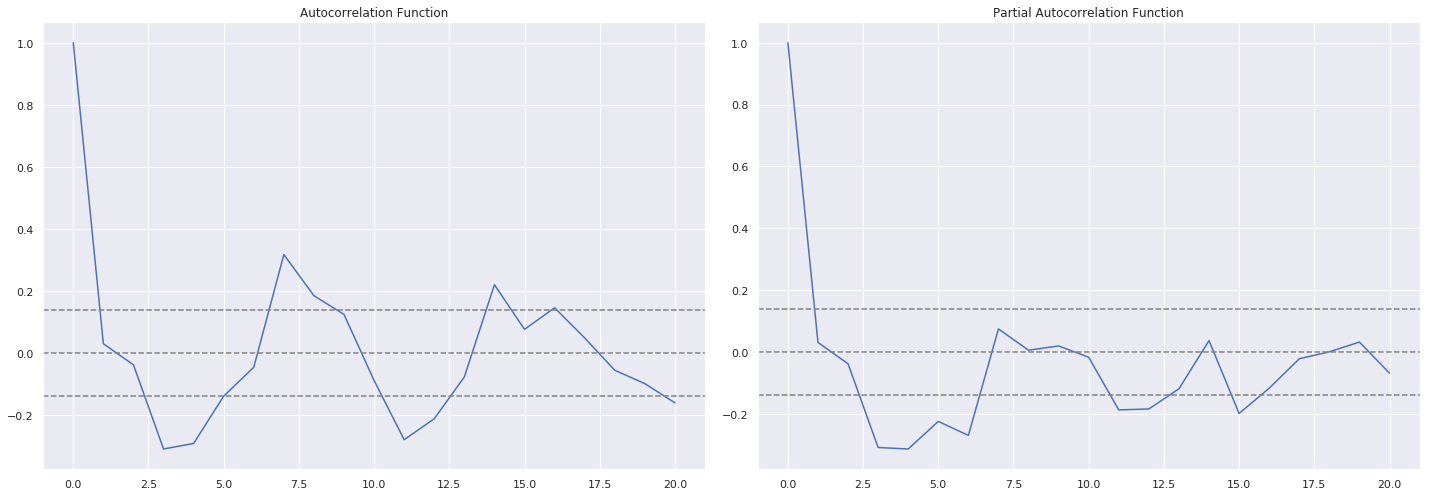

In [115]:
# ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

dataset_acf = acf(decomposedData, nlags = 20)
dataset_pacf = pacf(decomposedData, nlags = 20, method = 'ols')

plt.figure(figsize=(20,7))
# Plot ACF:
plt.subplot(121)
plt.plot(dataset_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96 / np.sqrt(len(dataset)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataset)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(dataset_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96 / np.sqrt(len(dataset)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataset)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()


/home/aman/miniconda3/envs/ml/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 100.0714')

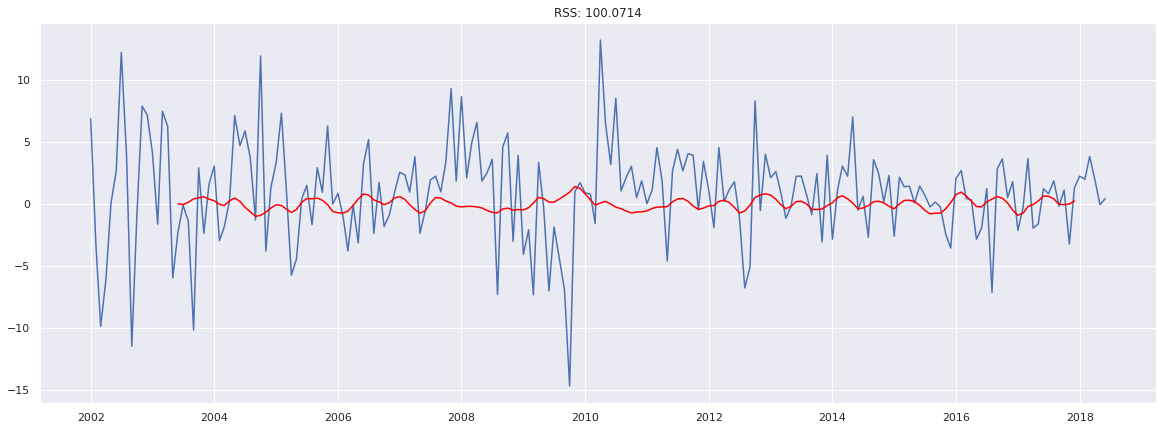

In [117]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(decomposedData, order = (2,0,2))
results_ARIMA = model.fit(disp = -1)

plt.figure(figsize=(20,7))
plt.plot(dataset)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - decomposedData['Y'])**2))